#### [PREV](5.OOP_KNN.ipynb) | [HOME](../README.md) | [NEXT](7.OOP_Neural_Network_Adv.ipynb)

---

#  Neural Network Linear Regression: Simple approach

This Jupyter Notebook trains a very simple neural network model to perform Linear Regression. We will use the NESA Course Specifications Linear Regression dataset, which students are already familiar with so, they can focus on understanding the TensorFlow OOP Neural Network implementation.

#### Step 1 - Import Dependencies

In [34]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error,mean_squared_error 

print(tf.__version__)

2.19.0


#### Step 2: Import The Data
We will extended the dataset, to allow for test/training splitting.

In [35]:
#Import data as a numPy array
# Training features
X_feature = np.array([[2], [4], [6], [8], [10], [12], [14], [16], [18], [20], [22], [24], [26]])

# Target variable
y_target = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25])


#### Step 3: Split The Data into Training And Testing Sets

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size=0.3)

#### Step 4: Visualise The Data

Text(0, 0.5, 'y')

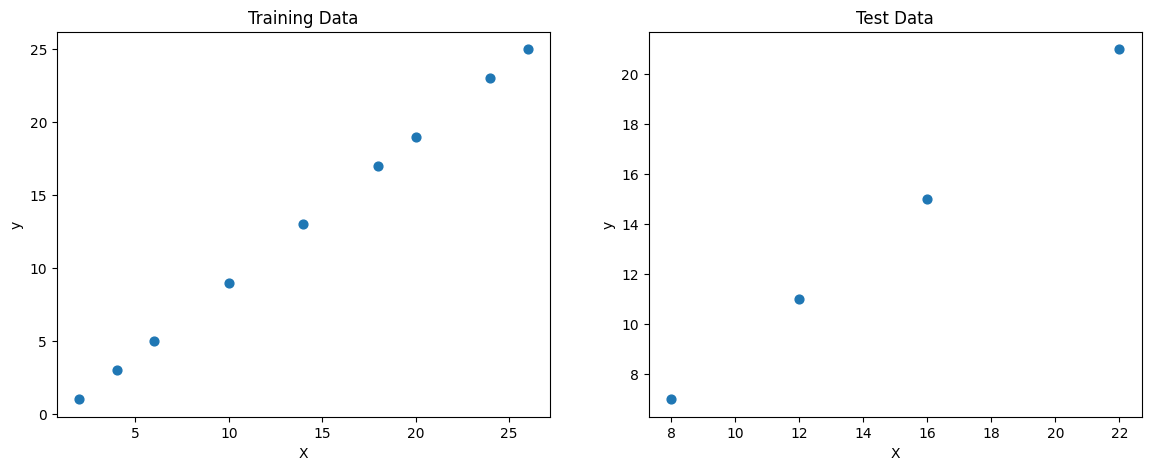

In [37]:
# Plot the training and test data
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(X_train, y_train, s=40)
axs[0].set_title("Training Data")
axs[0].set_xlabel("X")
axs[0].set_ylabel("y")


axs[1].scatter(X_test, y_test, s=40)
axs[1].set_title("Test Data")
axs[1].set_xlabel("X")
axs[1].set_ylabel("y")

#### Step 5: Instantiate a Neural Network Object And Configure The Layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [38]:
model = keras.Sequential([
    layers.Input(shape=(X_feature.shape[1],)), # Input layer, shape is always equal to the array dimensions
    layers.Dense(5, activation='relu'),  # Hidden layer with 5 neurons and ReLU activation
    layers.Dense(1)   # Output layer with a single neuron for regression
])

In [39]:
model.compile(optimizer='adam', loss='mean_squared_error')

#### Step 6: Fit The Model

Fitting (Training) the neural network model requires the following steps:

1. Fit the training data to the model. In this example, the training data is in the `X_train` and `y_train` arrays.
2. The model learns to associate features and targets.
3. You ask the model to make predictions about a test set—in this example, the `X_test`.
4. Verify that the predictions match the targets from the `y_ array` array.


In [40]:
# You can adjust the number of epochs and batch size based on your data and resources.
model.fit(X_train, y_train, epochs=200, batch_size=4, validation_data=(X_test, y_test))

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 30.3533 - val_loss: 25.5965
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 26.0395 - val_loss: 24.1350
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 26.8593 - val_loss: 22.7820
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 21.4497 - val_loss: 21.5061
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 22.8857 - val_loss: 20.1929
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 23.2420 - val_loss: 18.9108
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 20.3356 - val_loss: 17.6575
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 22.6224 - val_loss: 16.4856
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 18.5477 - val_loss: 15.4430
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 17.3723 - val_loss: 14.4590
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 15.0623 - val_loss: 13.5103
Epoch 12/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step -

An epoch means training the neural network with all the training data for one cycle. In an epoch, we use all of the data exactly once as a forward pass then a backward pass.

### Step 8: Make predictions

With the model trained, you can use it to make predictions about new features.

In [41]:
#Predict the target for a new data point
new_y = np.array([4])

new_y = model.predict(new_y)
print(f"New feature is:\n{new_y}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
New feature is:
[[3.802793]]


#### Step 9: Plot the Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


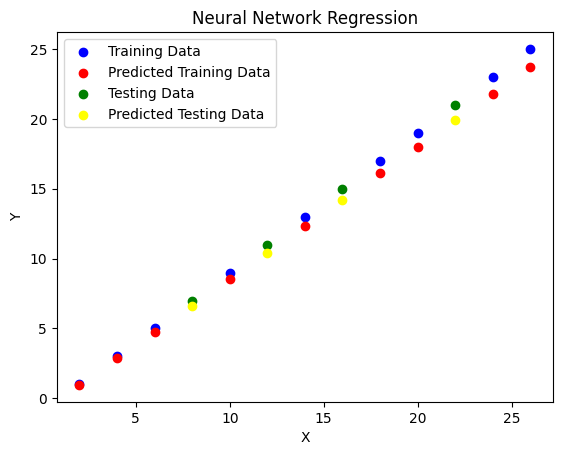

In [42]:
# Plot the actual data and model predictions
plt.scatter(X_train, y_train, label='Training Data', color='blue')
plt.scatter(X_train, model.predict(y_train), label='Predicted Training Data', color='red')
plt.scatter(X_test, y_test, label='Testing Data', color='green')
plt.scatter(X_test, model.predict(y_test), label='Predicted Testing Data', color='yellow')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Neural Network Regression')
plt.show()

#### Step 9: Evaluate The Model

In [47]:
#Get Evalutative Data from the model
model_eval = model.evaluate(X_test, y_test)
print(f"Model Evalutation: {model_eval:.4f}")
mae = mean_absolute_error(y_true=y_train,y_pred=model.predict(y_train)) 
mse = mean_squared_error(y_true=y_train,y_pred=model.predict(y_train))
print("MAE:",mae) 
print("MSE:",mse) 
print()

#Manually calculate the loss and cost of the model
predictions = model.predict(y_train).flatten()
model_loss = pd.DataFrame({
    'Target': y_train,
    'Predicted result': predictions,
    'Loss': abs(y_train - predictions)
})
model_cost = (1/model_loss.shape[0]) * (model_loss['Loss'].sum() / model_loss.shape[0])
print(f"The cost or average loss of this model is {model_cost:.5f}")
print(model_loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1351
Model Evalutation: 0.1351
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 0.6650716066360474
MSE: 0.6378932595252991

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The cost or average loss of this model is 0.07390
   Target  Predicted result      Loss
0      19         18.003279  0.996721
1      25         23.683472  1.316528
2      23         21.790073  1.209927
3      17         16.109879  0.890121
4       3          2.856094  0.143906
5       9          8.536287  0.463713
6       5          4.749493  0.250507
7      13         12.323083  0.676917
8       1          0.962696  0.037304
